# Data Analysis on Titanic Survival data .

#### Importing  necessary modules :

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### reading the file:

In [316]:
df=pd.read_csv(r"D:\EXCEL\titanic_train.csv")

In [317]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Exploratory data analysis 

In [318]:
df.shape

(891, 12)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [320]:
df.describe()  #for all numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [321]:
df.describe(include="object") # for categorical columns

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: xlabel='Survived', ylabel='count'>

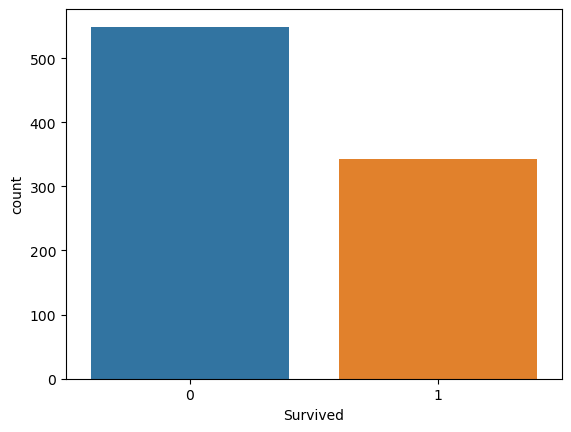

In [322]:
sns.countplot(data=df,x="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

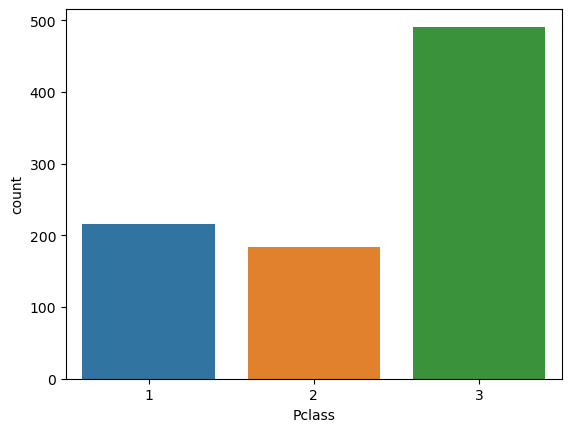

In [323]:
sns.countplot(data=df,x="Pclass")

<Axes: xlabel='Embarked', ylabel='count'>

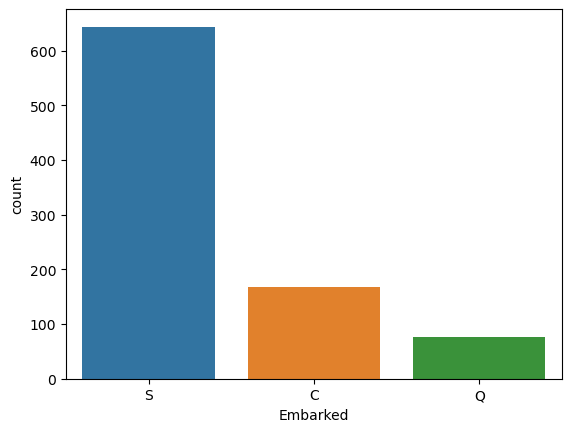

In [324]:
sns.countplot(data=df,x="Embarked")

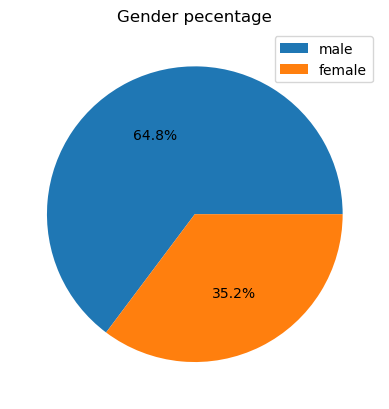

In [325]:
plt.pie(df.Sex.value_counts(),autopct="%.1f%%")
plt.title("Gender pecentage")
plt.legend(labels=df.Sex)

<Axes: xlabel='SibSp', ylabel='count'>

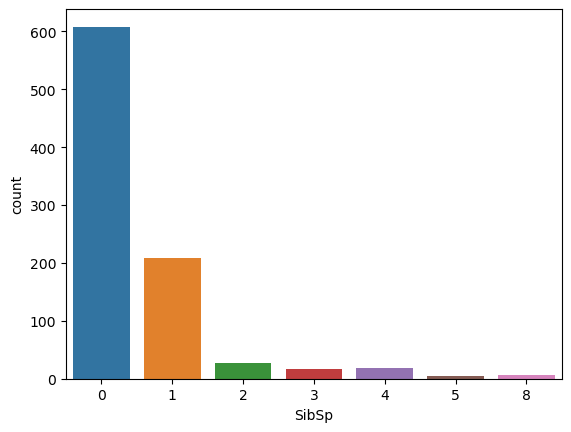

In [326]:
sns.countplot(data=df,x="SibSp")

C:\Users\Deepthi\AppData\Local\Temp\ipykernel_9144\1239919984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

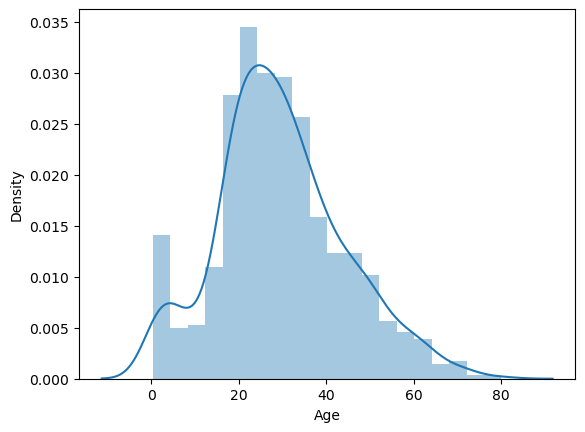

In [327]:
sns.distplot(df.Age)

Frequency distribution of age indicate that more number of individual boarder to ship fall under age group 20-40 and tail trailing off to right side  with older age group indicating that its a positively skewed.

<Axes: xlabel='Parch', ylabel='count'>

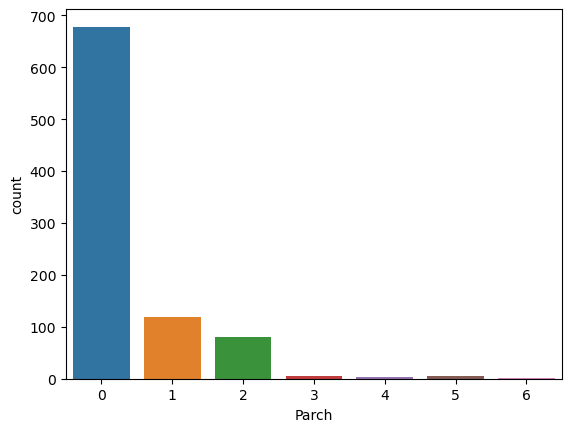

In [328]:
sns.countplot(data=df,x=df.Parch)

Visualizing number of survivals based on a Gender 

In [329]:
a=pd.pivot_table(df,index="Sex",columns="Survived",aggfunc={"Survived":"count"})

<Axes: xlabel='Sex'>

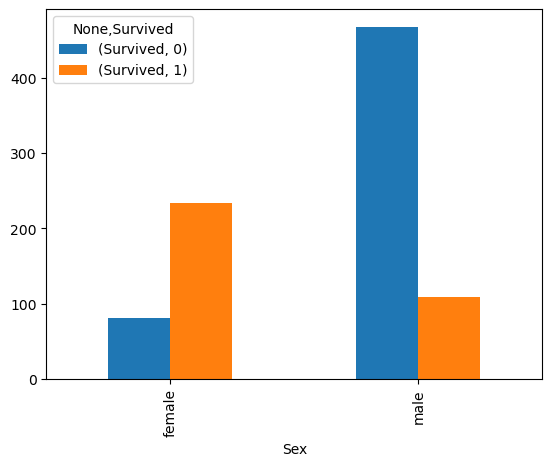

In [330]:
a.plot.bar()

Number of Female  who survived is more than male

In [331]:
b=pd.pivot_table(df,index="Pclass",columns="Survived",aggfunc={"Survived":"count"})

<Axes: ylabel='Pclass'>

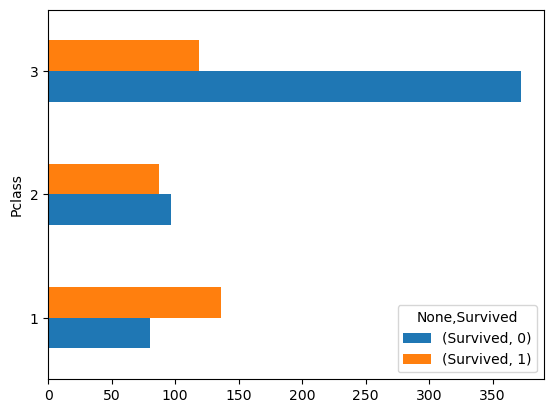

In [332]:
b.plot.barh()

From the graph we can infer that more number of survivals were in pclass 1 with less death rate comparatively

In [333]:
c=pd.pivot_table(df,index="Embarked",columns="Survived",aggfunc={"Survived":"count"})

<Axes: xlabel='Embarked'>

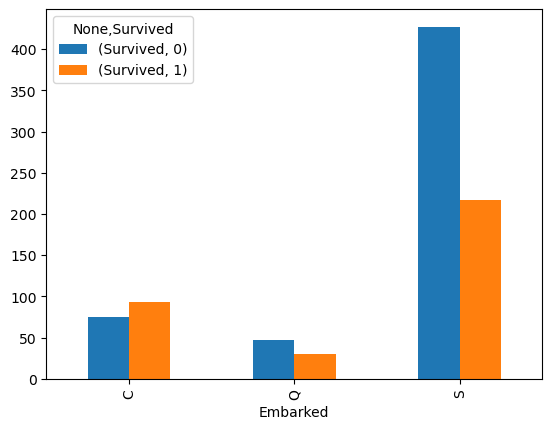

In [334]:
c.plot.bar()

In [335]:
d=pd.pivot_table(df,index="SibSp",columns="Survived",aggfunc={"Survived":"count"})

<Axes: ylabel='SibSp'>

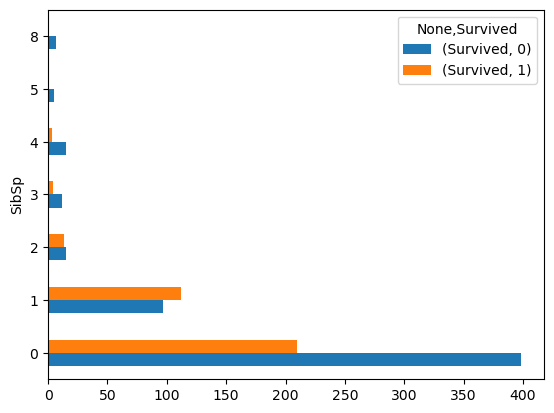

In [336]:
d.plot.barh()

In [337]:
e=pd.pivot_table(df,index="Parch",columns="Survived",aggfunc={"Survived":"count"})

<Axes: xlabel='Parch'>

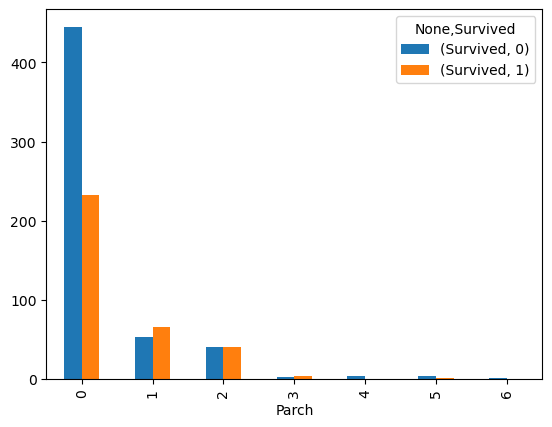

In [338]:
e.plot.bar()

In [339]:
def mn(a):
    b=a.split(", ")
    c=b[1].split(" ")
    return c[0]

In [340]:
df["middle_name"]=df.Name.apply(mn)

In [341]:
df.head() # checking the newly created column in dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,middle_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [342]:
f=pd.pivot_table(df,index="middle_name",columns="Survived",aggfunc={"Survived":"count"})

<Axes: ylabel='middle_name'>

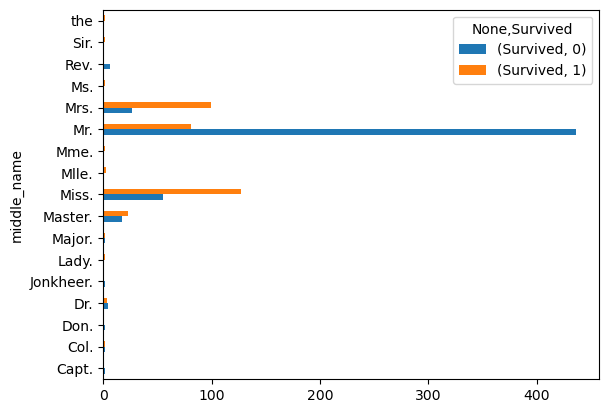

In [343]:
f.plot.barh()

C:\Users\Deepthi\AppData\Local\Temp\ipykernel_9144\288865136.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="crest")


<Axes: >

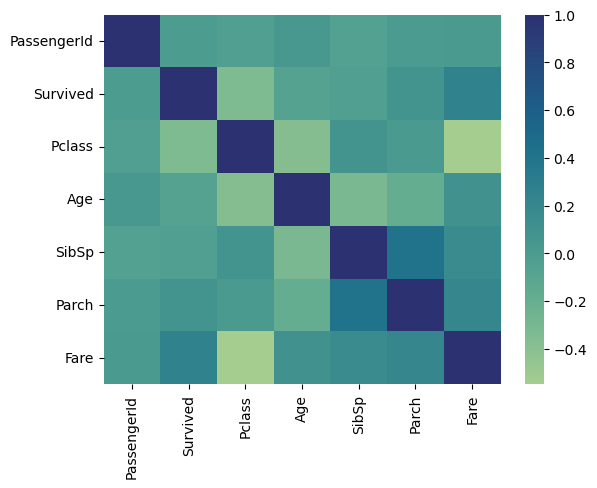

In [344]:
sns.heatmap(df.corr(),cmap="crest")

#### Data Cleaning

In [345]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
middle_name      0
dtype: int64

In [346]:
z=["Age","Cabin"]
for x in z:
    print(f"percentage of missing values of columns {x} id {round(df[x].isna().mean()*100,0)}%")

percentage of missing values of columns Age id 20.0%
percentage of missing values of columns Cabin id 77.0%


Since Cabin column has missing value percentage greater than 40% I would prefer dropping this column and imuting age column based on the average age for each honorofics.

#### Imputing

Imputing age column

In [347]:
ad=pd.pivot_table(df,index="middle_name",values=["Age"],aggfunc="mean")

In [348]:
ad

,Age
middle_name,
Capt.,70.000000
Col.,58.000000
Don.,40.000000
Dr.,42.000000
Jonkheer.,38.000000
Lady.,48.000000
Major.,48.500000
Master.,4.574167
Miss.,21.773973


In [349]:
df=pd.merge(df,ad,on="middle_name",how="left")

In [350]:
def age(row):
    if np.isnan(row["Age_x"]):
        return row["Age_y"]
    return row["Age_x"]

In [351]:
df["Age"]=df.apply(age,axis=1)

In [352]:
df.drop(["Age_x","Age_y"],inplace=True,axis=1)

In [353]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,middle_name,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Mr.,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Mrs.,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Mrs.,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,Mr.,35.0


dropping cabin column

In [354]:
df.drop(["Cabin"],axis=1,inplace=True)

In [356]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,middle_name,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,Mr.,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,Mrs.,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,Miss.,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,Mrs.,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,Mr.,35.0


Imputing Embarked column with mode of a column

In [357]:
df.Embarked.replace({np.nan:df.Embarked.mode()[0]},inplace=True)

In [358]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
middle_name    0
Age            0
dtype: int64

checking for duplicated row 

In [359]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,middle_name,Age


In [360]:
# There is no duplicated row

#### Encoding

In [361]:
df=pd.get_dummies(df,prefix="sex",columns=["Sex"])

In [362]:
df=pd.get_dummies(df,prefix="Emb",columns=["Embarked"])

#### Descriptive statistics

#### Standardizing the data

In [363]:
mm=MinMaxScaler()

In [364]:
df0=df.drop(["Name","middle_name","Ticket","PassengerId"],axis=1)

In [365]:
df1=mm.fit_transform(df0)

In [366]:
df1=pd.DataFrame(df1,columns=df0.columns)

In [367]:
df1.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,sex_female,sex_male,Emb_C,Emb_Q,Emb_S
0,0.0,1.0,0.125,0.0,0.014151,0.271174,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.139136,0.472229,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.015469,0.321438,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.103644,0.434531,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.015713,0.434531,0.0,1.0,0.0,0.0,1.0


### splitting the data

In [368]:
x=df1.drop(["Survived"],axis=1)

In [369]:
y=df1.Survived.to_frame()

In [370]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### Logistic Regression

In [371]:
lr=LogisticRegression()

In [372]:
lr.fit(x_train,y_train)

C:\Users\Deepthi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [373]:
lr.coef_

array([[-2.07936995, -1.31363792,  0.0767829 , -0.0275469 , -2.12089462,
         1.32564685, -1.32535009,  0.18620221,  0.07167596, -0.25758141]])

In [374]:
lr.intercept_

array([2.0365724])

In [375]:
yp=lr.predict(x_test)

In [376]:
lr.score(x_train,y_train)

0.8041733547351525

In [377]:
lr.score(x_test,y_test)

0.7761194029850746

In [378]:
m=metrics.confusion_matrix(y_test,yp)

In [379]:
m

array([[131,  22],
       [ 38,  77]], dtype=int64)

In [380]:
print(metrics.classification_report(y_test,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       153
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [381]:
cm=metrics.ConfusionMatrixDisplay(m,display_labels=[False,True])

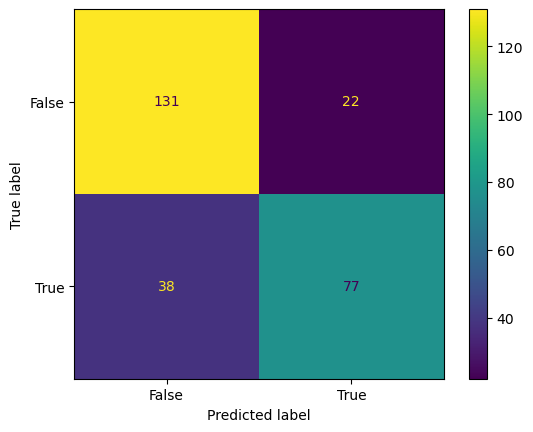

In [382]:
cm.plot()